In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

### **1- Read Dataset**

In [3]:
df = pd.read_csv("C:/Users/HP/Downloads/Advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
#drop Unnamed: 0 column
df.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### **2- Data Visualization**

In [8]:
df['Total'] = df['TV'] + df['Newspaper'] + df['Radio']

In [9]:
df.head()

,TV,Radio,Newspaper,Sales,Total
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='Total', ylabel='Sales'>

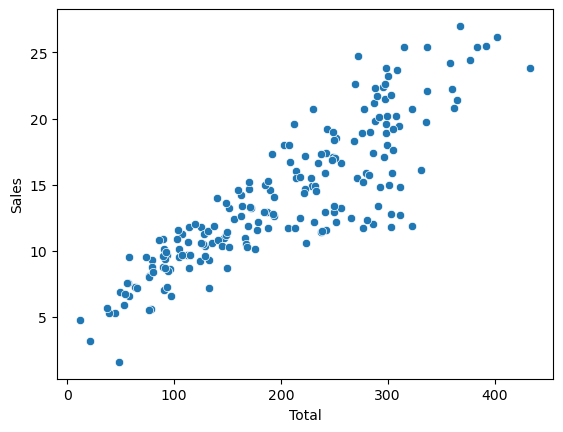

In [10]:
sns.scatterplot(x = 'Total', y = 'Sales', data = df)

<Axes: xlabel='Total', ylabel='Sales'>

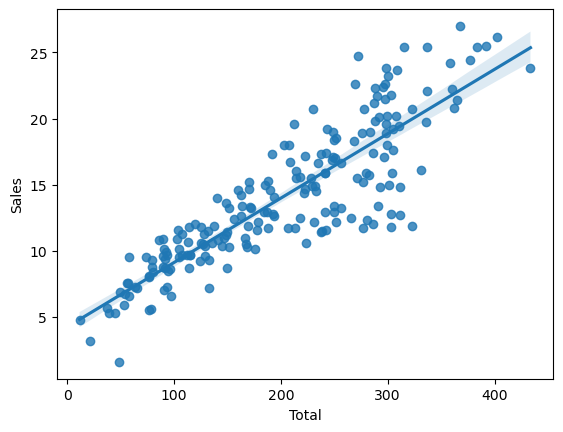

In [11]:
sns.regplot(x = 'Total', y = 'Sales', data = df)

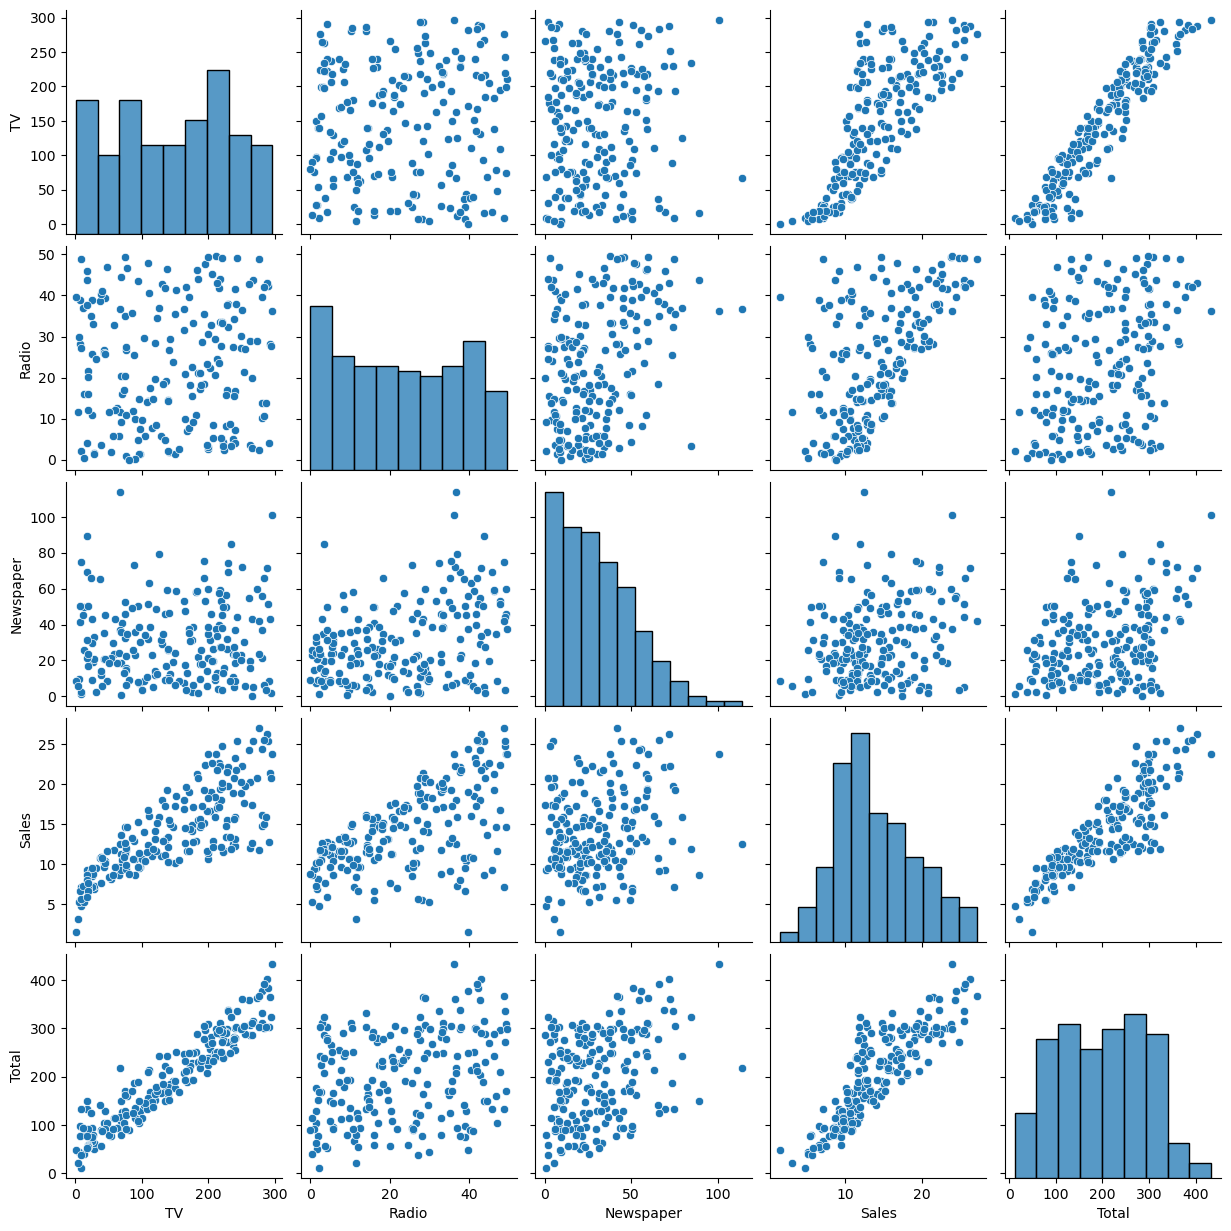

In [12]:
sns.pairplot(df)

### **3- Data Preprocessing**

In [13]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
Total        0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
#drop total column
df.drop(columns = ['Total'], axis = 1, inplace = True)

In [16]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
#check for maximum values in data
df.max()

TV           296.4
Radio         49.6
Newspaper    114.0
Sales         27.0
dtype: float64

In [18]:
#check for minimum values in data
df.min()

TV           0.7
Radio        0.0
Newspaper    0.3
Sales        1.6
dtype: float64

In [19]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [20]:
#split data into features and target
x = df.drop(['Sales'], axis = 1) #features
y = df['Sales'] #target / label

In [21]:
x.head() #features

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [22]:
y.head() #label/ target

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [23]:
#split data into train and test data
#train data ----> 80 %
#test data ----> 20 %
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [24]:
print('x_train shape', x_train.shape) #features of train 
print('y_train shape', y_train.shape) #label of train

x_train shape (160, 3)
y_train shape (160,)


In [25]:
print('x_test shape', x_test.shape) #features of test
print('y_test shape', y_test.shape) #label of test

x_test shape (40, 3)
y_test shape (40,)


### **4- Linear Regression Model**

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
#call LinearRegression
lr_model = LinearRegression()

In [28]:
#fit/train LinearRegression model on train data ----> x_train(features), y_train(label)
lr_model.fit(x_train, y_train)

LinearRegression()

In [29]:
#predict/test on test data (x_test)(features)
model_prediction = lr_model.predict(x_test)

In [30]:
model_prediction #predicted label ----> predicted answer 

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [31]:
y_test #actual label 

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

### **5- Performance Measure (Model Evaluation)**

performance : 
    1- regression ----> error
    2- classification ---> accuracy

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
mean_absolute_error(y_test, model_prediction) #actual label , predicted label

1.4607567168117606

In [34]:
mean_squared_error(y_test, model_prediction)

3.1740973539761046

In [35]:
#root mean squared error
np.sqrt(mean_squared_error(y_test, model_prediction))

1.7815996615334502

In [36]:
#model performance 
r2_score(y_test, model_prediction) #high value 

0.899438024100912

In [37]:
x_test.head()

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [39]:
print(lr_model.predict([[220.3, 49.0, 3.2]]))

[22.11237326]


D:\Anaconda\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
y_test.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64